# Работа с отдельным дата-сетом сердечных болезней (практика):

Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.

Датасет содержит следующие признаки:

* age — возраст

* sex — пол (1 - мужчина, 0 - женщина)

* cp — тип боли в груди (4 значения)

* trestbps — артериальное давление в покое

* chol — холестерин сыворотки в мг/дл

* fbs — уровень сахара в крови натощак > 120 мг/дл

* restecg — результаты электрокардиографии в покое (значения 0,1,2)

* thalach — достигнута максимальная частота сердечных сокращений

* exang — стенокардия, вызванная физической нагрузкой

* oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя

* slope — наклон пикового сегмента ST при нагрузке

* ca — количество крупных сосудов (0-3), окрашенных при флюроскопии

* thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn import preprocessing

In [2]:
# Начальный просмотр дата-фрейма heart
heart_df = pd.read_csv('Data/heart.csv')
display(heart_df.head(10))
display(heart_df.tail(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [3]:
display(heart_df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
# Создаем новый признак old, где 1 — при возрасте пациента более 60 лет.
# В ответ введим результат выполнения кода heart['old'].sum().
heart_df['old'] = heart_df['age'].apply(lambda x: 1 if x > 60 else 0)

In [5]:
heart_df['old'].sum()

79

Создаем новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. 
trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола можно взять из таблицы:

|Возраст (лет)	|Мужчины	|Женщины|
|-------------|---------|--------|
|до 20	|123/76	|116/72|
|21-30	|126/79	|120/75|
|31-40	|129/81	|127/80|
|41-50	|135/83	|137/84|
|51-60	|142/85	|144/85|
|61 и старше	|142/80	|159/85|

В таблице систолическое давление написано первым, перед дробной чертой.

In [6]:
# Создадим словарь
pressue_table = {
    'age_group': ['before_20', '21-30', '31-40', '41-50', '51-60', 'older_61'],
    'men': [123, 126, 129, 135, 142, 142],
    'woman': [116, 120, 127, 137, 144, 159]
}

# Конвертируем словарь в dataframe
pressue_df = pd.DataFrame(pressue_table)
display(pressue_df)

# Функция определения возраста
def check_age_group(age):
    if age <= 20: return 'before_20'
    if 21 <= age <= 30: return '21-30'
    if 31 <= age <= 40: return '31-40'
    if 41 <= age <= 50: return '41-50'
    if 51 <= age <= 60: return '51-60'
    else: return 'older_61'

# Временно создаем в нашем дата сете признака группы возраста
heart_df['age_group'] = heart_df['age'].apply(check_age_group)

# Присоединяем среднее давление по группам и полу
heart_df = heart_df.merge(pressue_df, on='age_group', how='left')
display(heart_df.head(10))

,age_group,men,woman
0,before_20,123,116
1,21-30,126,120
2,31-40,129,127
3,41-50,135,137
4,51-60,142,144
5,older_61,142,159


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,age_group,men,woman
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,older_61,142,159
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,31-40,129,127
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,41-50,135,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,51-60,142,144
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,51-60,142,144
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,0,51-60,142,144
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,0,51-60,142,144
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,0,41-50,135,137
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0,51-60,142,144
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,0,51-60,142,144


In [7]:
# Создаем новый признак и присваиваем по возрасту и полу
heart_df['trestbps_mean'] = heart_df.apply(lambda row: row['men'] if row['sex'] == 1 else row['woman'], axis=1)

# Удаляем лишние признаки
heart_df = heart_df.drop(columns=['age_group', 'men', 'woman'])

In [8]:
# В ответ пишем значение признака trestbps_mean для пациента под номером 300.
display(heart_df['trestbps_mean'].loc[300])

142

In [9]:
display(heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  old            303 non-null    int64  
 15  trestbps_mean  303 non-null    int64  
dtypes: float64(1), int64(15)
memory usage: 38.0 KB


None

Проанализировав наш дата сет можно сделать вывод, что он содержит следующие категориальные признаки:
- sex
- cp
- fbs
- restecg
- exang
- slope
- ca
- thal
- target

Категориальные признаки для которых нужно провести дополнительное кодирование (если категорий больше трех):
- cp
- restecg
- slope
- ca
- thal

Поскольку среди отобранного списка нет порядковых признаков (с естественным порядком) и количество категорий не превышает 15, а гораздо меньше, то кодирование будет производиться OneHotEncoding

In [10]:
# Закодируем вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. 
# Параметр use_cat_names оставляем по умолчанию.
cols_to_decode = ['cp', 'restecg', 'slope', 'ca', 'thal']
encoder = ce.OneHotEncoder(cols=cols_to_decode)
encoded_data = encoder.fit_transform(heart_df[cols_to_decode])
# Присоединяем результаты к нашему дата-сету
heart_df = pd.concat([heart_df, encoded_data], axis=1)
display(heart_df)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/category_encoders/

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,1,0,0,0,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,1,0,0,0,0,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,...,1,1,0,0,0,0,0,0,1,0
299,45,1,3,110,264,0,1,132,0,1.2,...,1,1,0,0,0,0,0,0,1,0
300,68,1,0,144,193,1,1,141,0,3.4,...,1,0,1,0,0,0,0,0,1,0
301,57,1,0,130,131,0,1,115,1,1.2,...,1,0,0,1,0,0,0,0,1,0


In [11]:
# Удаляем исходные признаки
heart_df = heart_df.drop(columns=cols_to_decode, axis=1)

In [12]:
display(heart_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    int64  
 11  cp_1           303 non-null    int64  
 12  cp_2           303 non-null    int64  
 13  cp_3           303 non-null    int64  
 14  cp_4           303 non-null    int64  
 15  restecg_1      303 non-null    int64  
 16  restecg_2      303 non-null    int64  
 17  restecg_3      303 non-null    int64  
 18  slope_1   

None

Нормализуем все числовые признаки с помощью метода RobustScaler(), хоть в дата-сете нет пропусков и выбросов, но данные по сути сырые

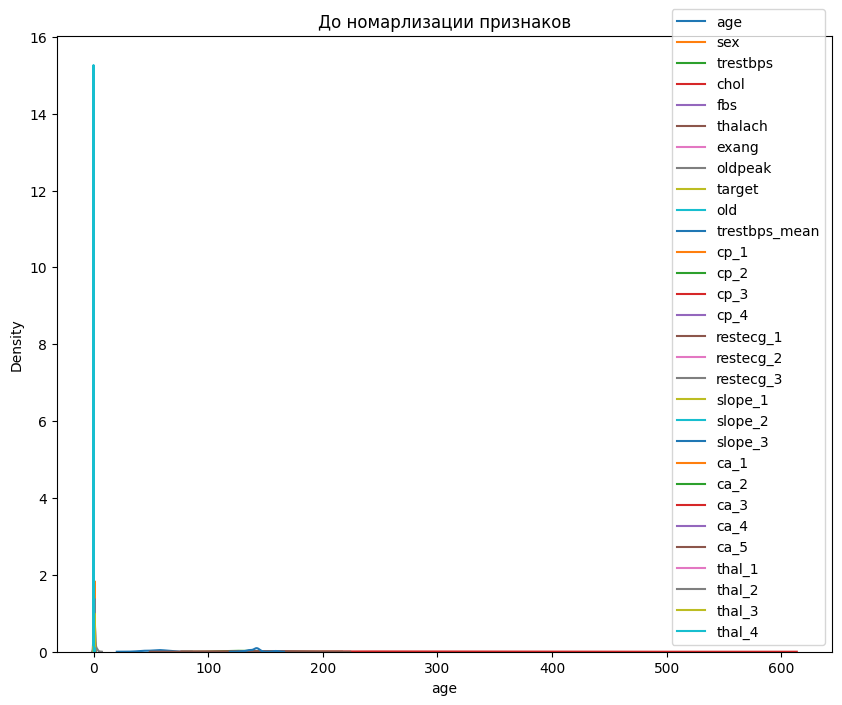

In [13]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('До номарлизации признаков')

for name in heart_df.columns:
    sns.kdeplot(heart_df[name], ax=ax1, label=name)
plt.legend()

In [17]:
# Нормализуем все числовые признаки подходящим способом.
col_names = list(heart_df.columns)

# инициализируем нормализатор RobustScaler   
normalizer = preprocessing.RobustScaler()
# кодируем исходный датасет
normalized_df = normalizer.fit_transform(heart_df)

# Преобразуем промежуточный датасет в полноценный дата-фрейм
heart_df_mm = pd.DataFrame(normalized_df, columns=col_names)

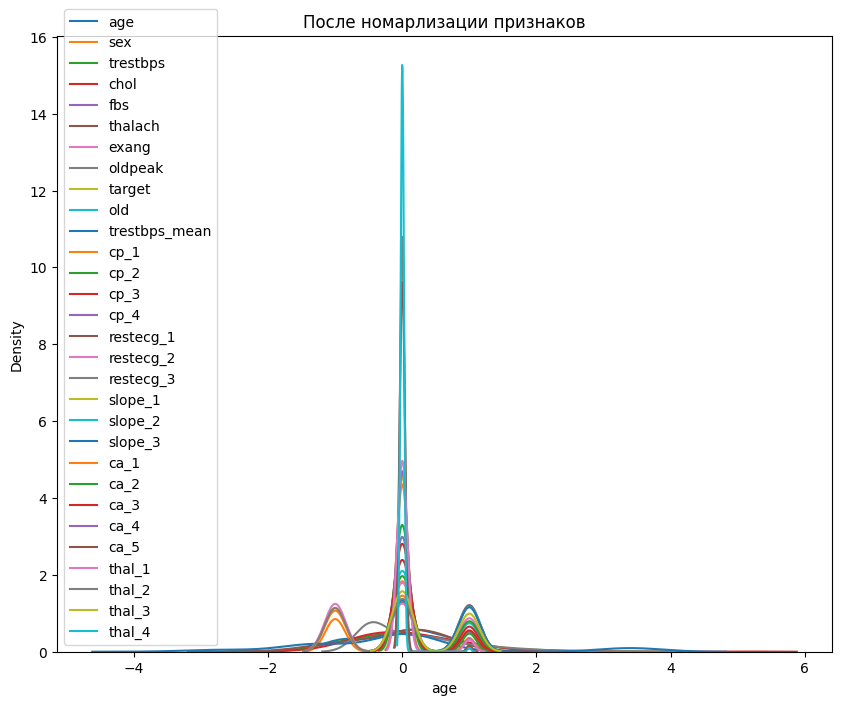

In [18]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После номарлизации признаков')

for name in col_names:
    sns.kdeplot(heart_df_mm[name], ax=ax1, label=name)
plt.legend()

In [19]:
# В ответе напишем стандартное отклонение (Std) признака chol. Ответ округляем до шести знаков после запятой.
chol_std = round(heart_df_mm['chol'].std(), 6)
display(chol_std)

0.816232

Отберем для будущей модели признаки и выявим сильно скоррелированные

<Axes: >

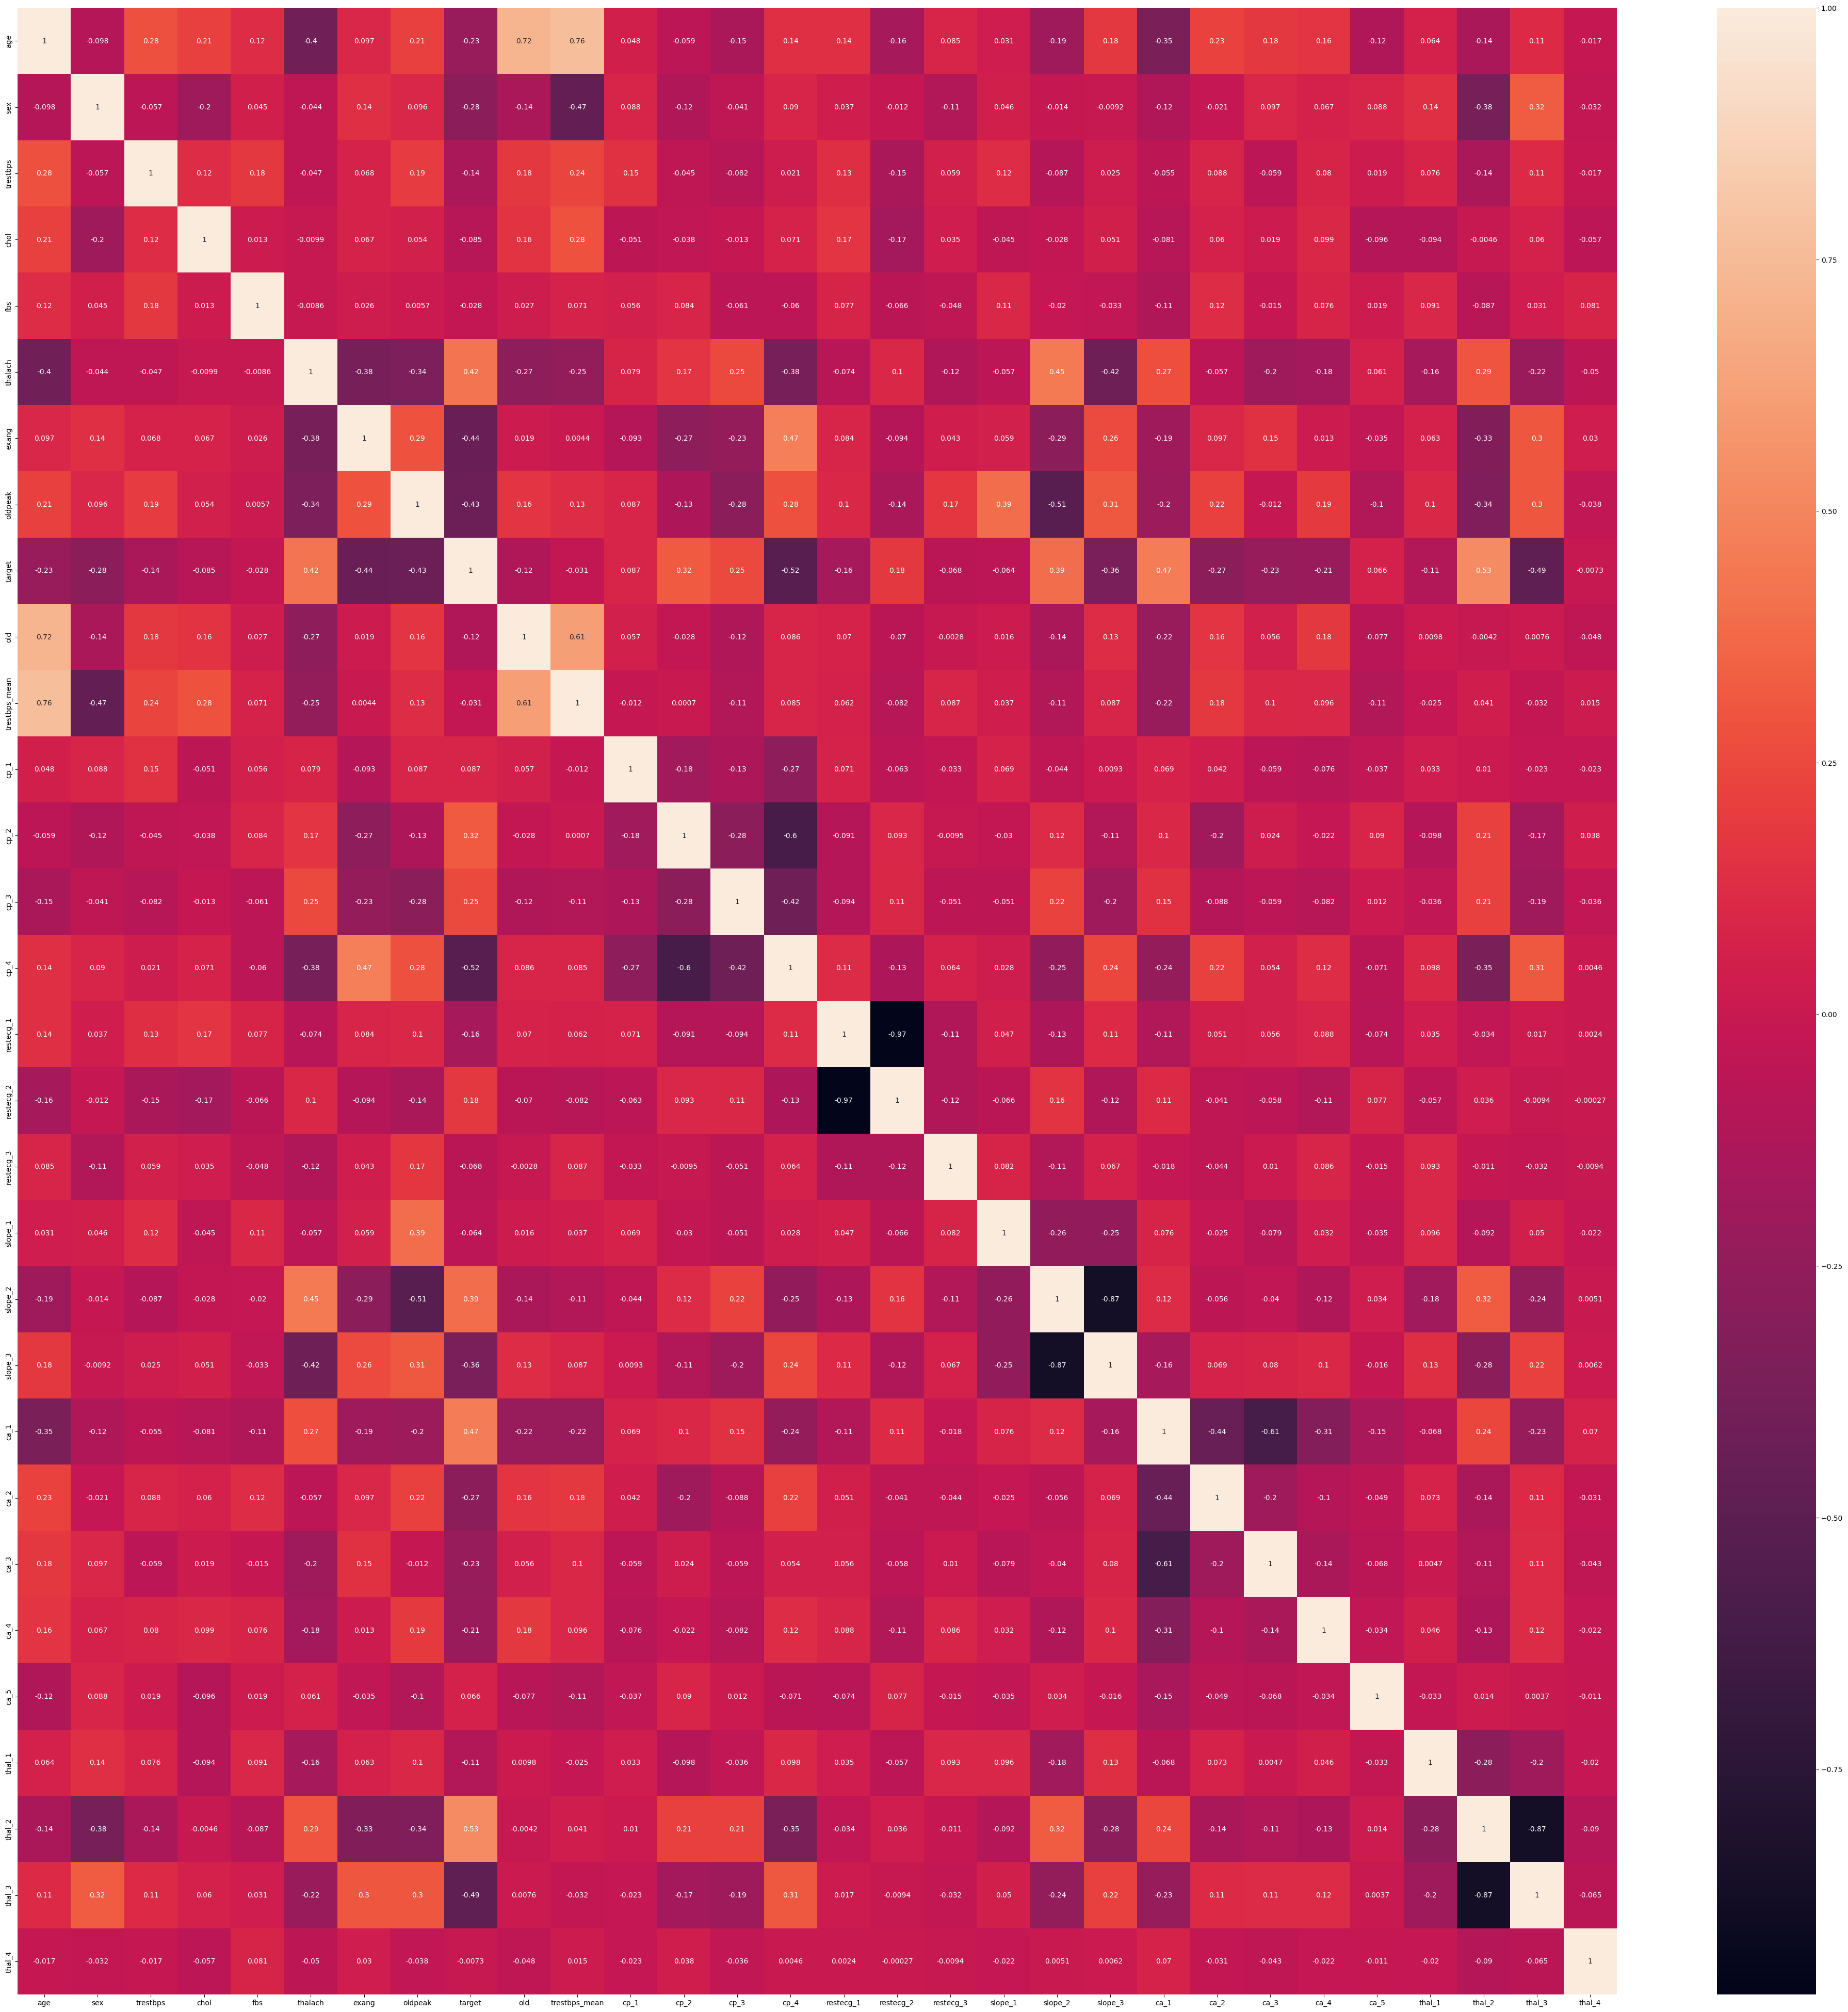

In [20]:
selected_features = heart_df.columns

# Построим график
fig, (ax1) = plt.subplots(ncols=1, figsize=(50, 50))
sns.heatmap(heart_df.corr(numeric_only=True), annot=True, ax=ax1)

Сильно скоррелированными парами являются:
- [age, old]
- [age, trestbps_mean]
- [thal_2, thal_3]
- [restecg_1, restecg_2]
- [slope_2, slope_3]